#  💾 Reading a text-based dataset into pandas and import liabrary

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import re
df=pd.read_csv('../input/textdata/ex.txt',sep=',')
df.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [2]:
#drop columns
df=df.drop(['Unnamed: 0'],axis=1)
df=df.drop(['filename'],axis=1)
df=df.drop(['Message-ID'],axis=1)
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


# 🔍 Exploratory Data Analysis (EDA)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  48076 non-null  object
 1   Class    48076 non-null  object
dtypes: object(2)
memory usage: 751.3+ KB
None


In [4]:
#shape of the data
print('shape of the data:',df.shape)
print('column of data :',df.columns)

shape of the data: (48076, 2)
column of data : Index(['content', 'Class'], dtype='object')


AxesSubplot(0.125,0.125;0.62x0.755)


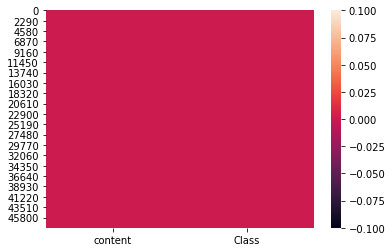

In [5]:
import seaborn as sns
print(sns.heatmap(df.isnull()))


no null values in dataset

in given dataset no dublicates value

class of non_abusive is 93 % of total
class of abusive is 7 % of total


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

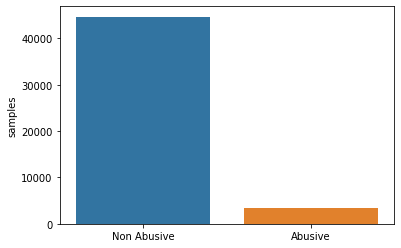

In [6]:
print('class of non_abusive is {} % of total'.format(round(df['Class'].value_counts()[0]/len(df['Class'])*100)))
print('class of abusive is {} % of total'.format(round(df['Class'].value_counts()[1]/len(df['Class'])*100)))
x=df.Class.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [7]:
print(df[df['Class']=='Abusive'].shape)
print(df[df['Class']=='Non Abusive'].shape)

(3410, 2)
(44666, 2)


In [8]:
df['words_count'] = df['content'].str.split().map(lambda x: len(x))
df.head()

,content,Class,words_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,37
1,fuck you,Abusive,2
2,Gentlemen:\nThe following champagne is availab...,Abusive,90
3,sorry i've taken so long...just been trying to...,Abusive,69
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,33


In [9]:
# Data Preprocessing

# Data Cleaning
#1.Remove URLs
#2.Remove HTML tags
#3.Remove emoji
#4.Remove numbers 

In [10]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)
df['content'] = df.content.apply(clean)
df.head()

,content,Class,words_count
0,eat shit\n\n\n\n\nJohn J Lavoratoexcelr\n PM\...,Abusive,37
1,fuck you,Abusive,2
2,Gentlemen\nThe following champagne is availabl...,Abusive,90
3,sorry ive taken so longjust been trying to fen...,Abusive,69
4,asshole\n\n\n\n\nJohn J Lavoratoexcelr\n AM\n...,Abusive,33


# Step 1: Punctuation

In [11]:
from string import punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation ]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

# Remove punctuation from both train and test dataset
df['content']=df['content'].apply(lambda x: remove_punctuation(x))
df['content']=df['content'].apply(lambda x: remove_punctuation(x))

df.head()

,content,Class,words_count
0,eat shit\n\n\n\n\nJohn J Lavoratoexcelr\n PM\...,Abusive,37
1,fuck you,Abusive,2
2,Gentlemen\nThe following champagne is availabl...,Abusive,90
3,sorry ive taken so longjust been trying to fen...,Abusive,69
4,asshole\n\n\n\n\nJohn J Lavoratoexcelr\n AM\n...,Abusive,33


# Step 2: Tokenization

In [12]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    split=re.split("\W+",text)
    return split
df['content']=df['content'].apply(lambda x: tokenize(x.lower()))
df.head()


,content,Class,words_count
0,"[eat, shit, john, j, lavoratoexcelr, pm, to, j...",Abusive,37
1,"[fuck, you]",Abusive,2
2,"[gentlemen, the, following, champagne, is, ava...",Abusive,90
3,"[sorry, ive, taken, so, longjust, been, trying...",Abusive,69
4,"[asshole, john, j, lavoratoexcelr, am, to, joh...",Abusive,33


# Step 3: Stop words

In [13]:
wf_df=pd.read_csv('../input/high-and-low-freword/wfdf.txt')
wf_df.head()

,Unnamed: 0,word,count
0,0,excelr,36298
1,1,subject,35176
2,2,pm,33899
3,3,please,31244
4,4,time,25628


In [14]:
low_frequency=wf_df[wf_df['count']<=2]
low_frequency_w=list(low_frequency['word'])
list(low_frequency_w[0:10])

['thingsa',
 'novy',
 'bearishness',
 'meyou',
 'masami',
 'saionji',
 'chiricahua',
 'joyride',
 'obedience',
 'invaded']

In [15]:
high_frequency=wf_df[wf_df['count']>=1000]
high_frequency_w=list(high_frequency['word'])
print(high_frequency_w[0:10])

['excelr', 'subject', 'pm', 'please', 'time', 'would', 'cc', 'email', 'week', 'new']


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(text):
    plt.figure(figsize=[12,16])
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

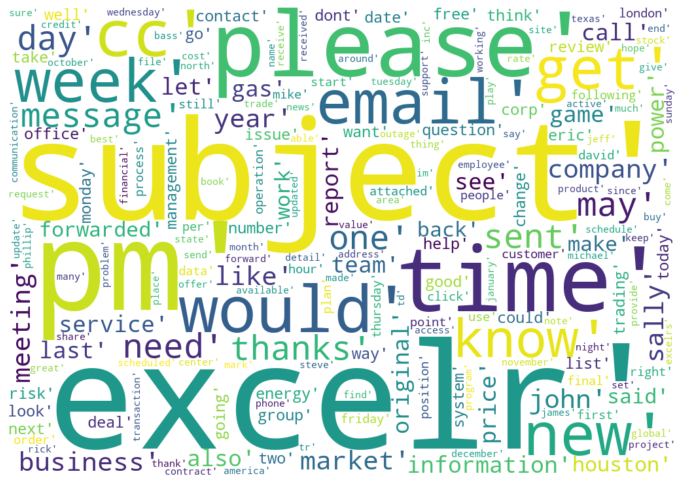

In [17]:
plot_wordcloud(str(high_frequency_w))

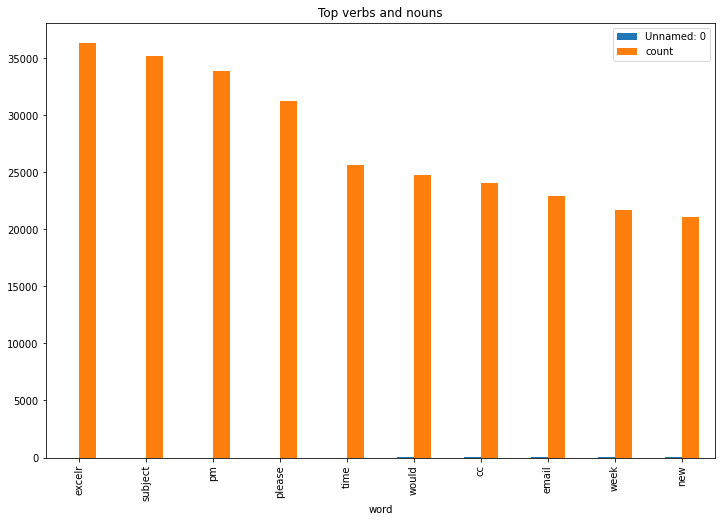

In [18]:
high_frequency[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')
plt.show()

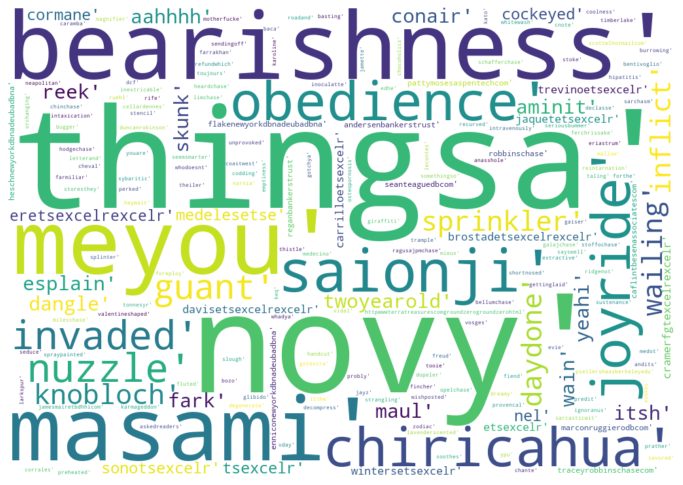

In [19]:
plot_wordcloud(str(low_frequency_w))

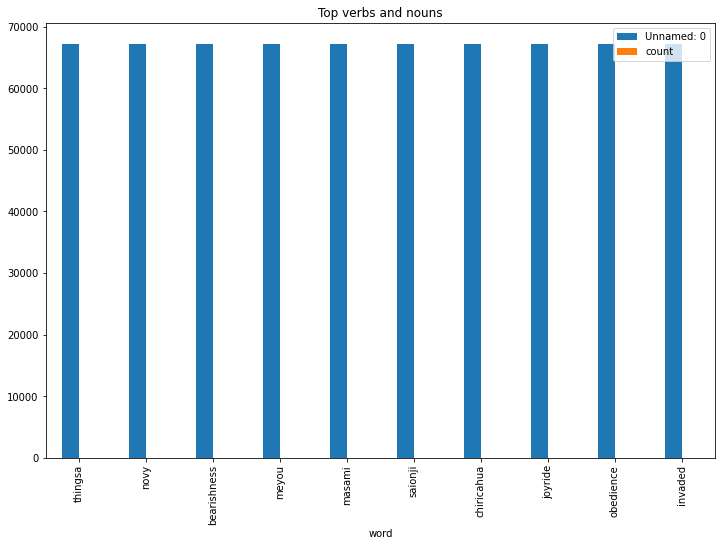

In [20]:
low_frequency[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')
plt.show()

In [21]:
import nltk
stopword = nltk.corpus.stopwords.words('english')
stopword.append(high_frequency_w)
stopword.append(low_frequency_w)

In [22]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

df['content']=df['content'].apply(lambda x: remove_stopwords(x))

df.head()

,content,Class,words_count
0,"[eat, shit, john, j, lavoratoexcelr, pm, john,...",Abusive,37
1,[fuck],Abusive,2
2,"[gentlemen, following, champagne, available, a...",Abusive,90
3,"[sorry, ive, taken, longjust, trying, fend, ch...",Abusive,69
4,"[asshole, john, j, lavoratoexcelr, john, arnol...",Abusive,33


# Step 4 : Lemmatize/ Stem

In [23]:

import spacy
nlp = spacy.load("en_core_web_sm")
nlp

In [24]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
ps = PorterStemmer()
  
lemmatizer=nltk.stem.WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
def lemmatize_text(word_list):
    
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output


df['content']=df['content'].apply(lambda x: lemmatize_text(x))
df.head()

,content,Class,words_count
0,eat shit john j lavoratoexcelr pm john arnoldh...,Abusive,37
1,fuck,Abusive,2
2,gentleman following champagne available approx...,Abusive,90
3,sorry ive taken longjust trying fend chick lif...,Abusive,69
4,asshole john j lavoratoexcelr john arnoldhouec...,Abusive,33


In [26]:
df5=df.iloc[0:,0]
text=''.join(df5)

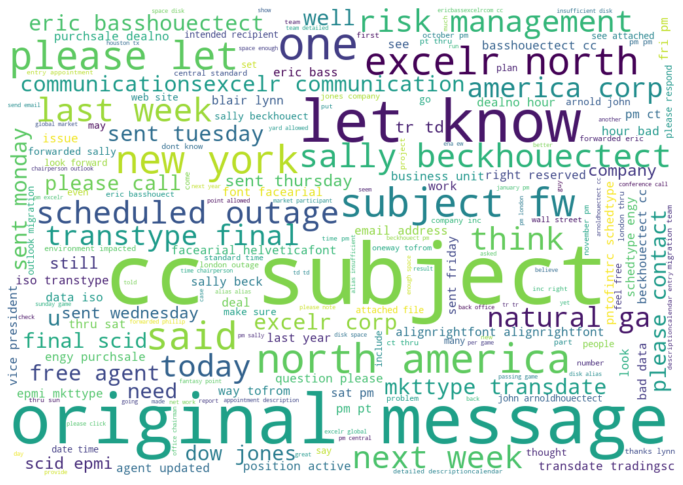

In [27]:
plot_wordcloud(text)

#from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df5)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
print(wf_df.head(50))
wf_df.shape

wf_df=wf_df.to_csv('wfdf.txt')

In [28]:
import spacy
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block =text[0:1000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [29]:
for token in doc_block[0:20]:
    print(token, token.pos_)

eat VERB
shit PROPN
john PROPN
j PROPN
lavoratoexcelr PROPN
pm PROPN
john PROPN
arnoldhouectect PROPN
cc PROPN
subject ADJ
football NOUN
bet PROPN
minn PROPN
buff PROPN
phil PROPN
indi PROPN
cinnci PROPN
det PROPN
clev PROPN
den PROPN


In [30]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['trading', 'wine', 'price', 'derived', 'spec', 'website', 'wine', 'stored', 'temperature', 'controlled', 'wine', 'storage', 'facility', 'quan', 'wine', 'perrier', 'brut', 'cliquot', 'dame', 'interestsorry']


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df['content'])

In [32]:
bow_matrix_ngram

<48076x100 sparse matrix of type '<class 'numpy.int64'>'
	with 660830 stored elements in Compressed Sparse Row format>

In [33]:
df12=pd.DataFrame(vectorizer_ngram_range.get_feature_names())
df13=pd.DataFrame(bow_matrix_ngram.toarray())
df14=pd.concat([df12,df13],axis=1)
df14.head(10)

,0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,also,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,attached,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,back,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,business,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,call,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,cc,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,cc subject,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,change,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,click,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,company,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df14.shape

(48076, 101)

In [35]:
df15=df14.iloc[0:10,0]
df16=list(df15)
df16

['also',
 'attached',
 'back',
 'business',
 'call',
 'cc',
 'cc subject',
 'change',
 'click',
 'company']

Text(0.5, 0, "['also', 'attached', 'back', 'business', 'call', 'cc', 'cc subject', 'change', 'click', 'company']")

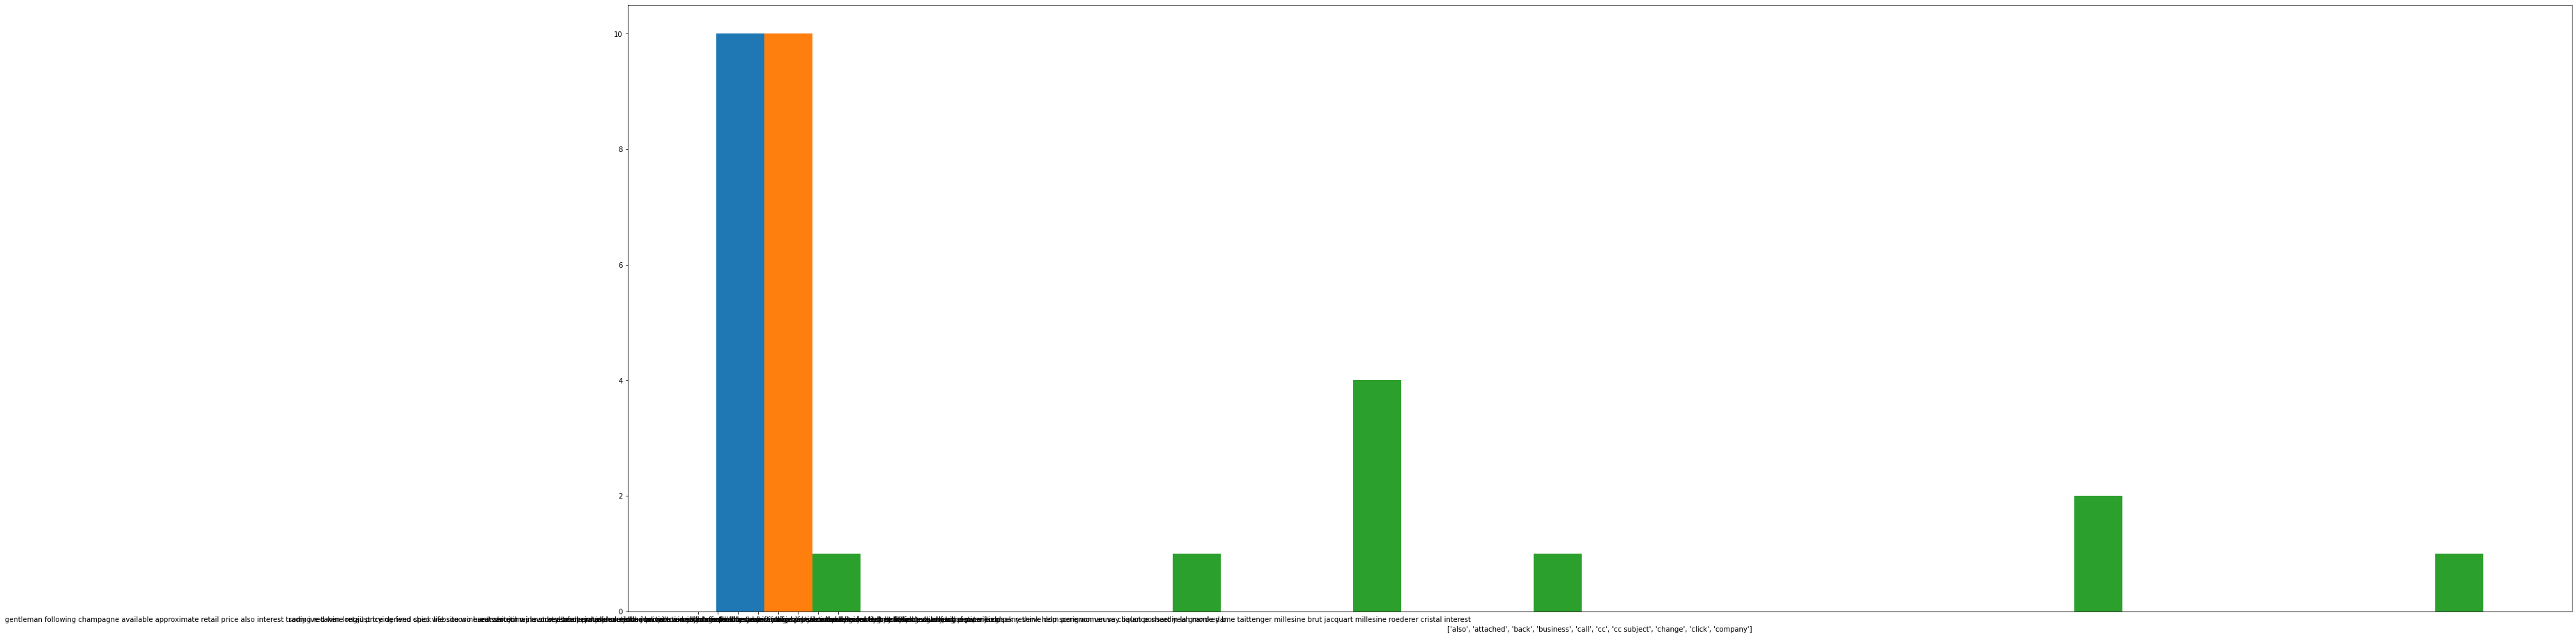

In [36]:
plt.figure(figsize=[50,16])
plt.hist(df[0:10])
plt.xlabel(df16)

In [37]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['Class']=lc.fit_transform(df['Class'])
df17=df['Class']
data=pd.concat([df14,df17],axis=1)
x=data.drop(['Class',0],axis=1)
y=data['Class']
x

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48071,0,1,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48072,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
48073,0,1,4,1,0,0,0,0,2,2,...,1,1,1,1,1,6,0,2,1,3
48074,0,1,1,1,0,0,1,0,1,1,...,3,2,1,4,2,0,1,0,2,2


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=2020)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(38460, 99)
(38460,)
(9616, 99)
(9616,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
RDclassifier = RandomForestClassifier(n_estimators=1000, random_state=0)
RDclassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [41]:
#random forest clssifier

In [42]:
y_pred=RDclassifier.predict(x_test)

In [43]:
np.mean(y_pred==y_test)*100

97.56655574043262

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[ 434   21]
 [ 213 8948]]
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       455
           1       1.00      0.98      0.99      9161

    accuracy                           0.98      9616
   macro avg       0.83      0.97      0.89      9616
weighted avg       0.98      0.98      0.98      9616



In [45]:
#naive_bayes multinomialNB classifier

In [46]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)
train_pred_m = classifier_mb.predict(x_test)
accuracy_train_m = np.mean(train_pred_m==y_test) 
accuracy_train_m

0.894134775374376

In [47]:
print(confusion_matrix(train_pred_m,y_test))
print(classification_report(train_pred_m,y_test))

[[ 246  617]
 [ 401 8352]]
              precision    recall  f1-score   support

           0       0.38      0.29      0.33       863
           1       0.93      0.95      0.94      8753

    accuracy                           0.89      9616
   macro avg       0.66      0.62      0.63      9616
weighted avg       0.88      0.89      0.89      9616



In [48]:
#logistic regression classifier

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
Y_pred=model.predict(x_test)
print(np.mean(Y_pred==y_test)*100)

93.75


In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_pred,y_test))
print(classification_report(Y_pred,y_test))

[[  79   33]
 [ 568 8936]]
              precision    recall  f1-score   support

           0       0.12      0.71      0.21       112
           1       1.00      0.94      0.97      9504

    accuracy                           0.94      9616
   macro avg       0.56      0.82      0.59      9616
weighted avg       0.99      0.94      0.96      9616



In [51]:
#support vector mactione

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
model = SVC(C= 15, gamma = 50)
model.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)